# SURPRISE HOUSING ASSIGNMENT

**PROBLEM STATEMENT**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house. 

Also, we need to determine the optimal value of lambda for ridge and lasso regression.

## STEP 1 - Reading and Understanding Data

In [1]:
# importing libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
# setting display option for dataframe
pd.set_option('display.max_rows', 100, 'display.max_columns', 120)

In [3]:
# reading the file in a dataframe amd checking the first five values
housing_df = pd.read_csv('train.csv',encoding = "ISO-8859-1", low_memory=False,index_col=0)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking shape of the dataframe
housing_df.shape

(1460, 80)

In [5]:
# checking datatypes of the variables and null values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# checking the distribution for continuous variable
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## STEP 2 - Data Cleaning Activities

- Fix Missing values
- Fixing rows and columns
- Standardise values
- Fix invalid values
- Filter data  

In [7]:
# checking null rows
for i in range(len(housing_df.index)) :
    row = housing_df.iloc[i].isnull().sum()
    if (row == 0) :
        print(i)

No index is printed, so we conclude that there is no empty rows

In [8]:
# checking for duplicate rows
housing_df.drop_duplicates(inplace = True)
housing_df.shape

(1460, 80)

No duplicate rows

In [9]:
# checking for missing column names. A zero value tells that no column name is missing
housing_df.columns.isna().sum()

0

In [10]:
# Checking the percentage of null values in each column
(housing_df.isna().sum().sum()/(housing_df.shape[0]*housing_df.shape[1]))*100

5.9631849315068495

We can find that almost 6% of the dataframe is null

In [11]:
# checking column names and missing values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**The datatype and names of all the columns look fine as per data dictionary. 
We need to impute some missing values.**

In [12]:
# Understanding categorical columns for null value imputation
null_cols = housing_df.select_dtypes(include = 'object').isnull().any()
null_cols_name = null_cols[null_cols == True]
null_cols_name

Alley           True
MasVnrType      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [13]:
# checking subset of dataframe having null values
housing_df[null_cols_name.index].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,
1,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
4,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
5,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


**Null values for the above categories indicates that the above facility is not present. So lets impute None value for missing data**

In [14]:
housing_df[null_cols_name.index] = housing_df[null_cols_name.index].fillna('None')

In [15]:
# checking null values for the continuous variables
check_missing_perc = 100*(housing_df.isnull().sum()/len(housing_df.index))
check_missing_perc[ check_missing_perc > 0]

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [16]:
# Filling LotFrontage and MasVnrArea with median value
# GarageYrBlt column is null when Garage is not present. So, putting a value 0 for null values
LotFrontage_median = housing_df['LotFrontage'].median()
MasVnrArea_median = housing_df['MasVnrArea'].median()
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(LotFrontage_median)
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(MasVnrArea_median)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

In [17]:
# Checking the dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**No null values**

In [18]:
# checking the columns having same value repeated more than 90% of the time
col_to_be_dropped = []
for col in housing_df.columns :
    max_count = housing_df[col].value_counts().max()
    if(max_count > 90/100*len(housing_df)):
        print(col,max_count)
        col_to_be_dropped.append(col)

Street 1454
Alley 1369
Utilities 1459
LandSlope 1382
Condition2 1445
RoofMatl 1434
Heating 1428
CentralAir 1365
Electrical 1334
LowQualFinSF 1434
BsmtHalfBath 1378
KitchenAbvGr 1392
Functional 1360
GarageCond 1326
PavedDrive 1340
3SsnPorch 1436
ScreenPorch 1344
PoolArea 1453
PoolQC 1453
MiscFeature 1406
MiscVal 1408


In [19]:
housing_df = housing_df.drop(col_to_be_dropped, axis =1)
housing_df.shape

(1460, 59)

In [20]:
# Lets check numerical variables
housing_df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,12.000000,2010.000000,442567.010000


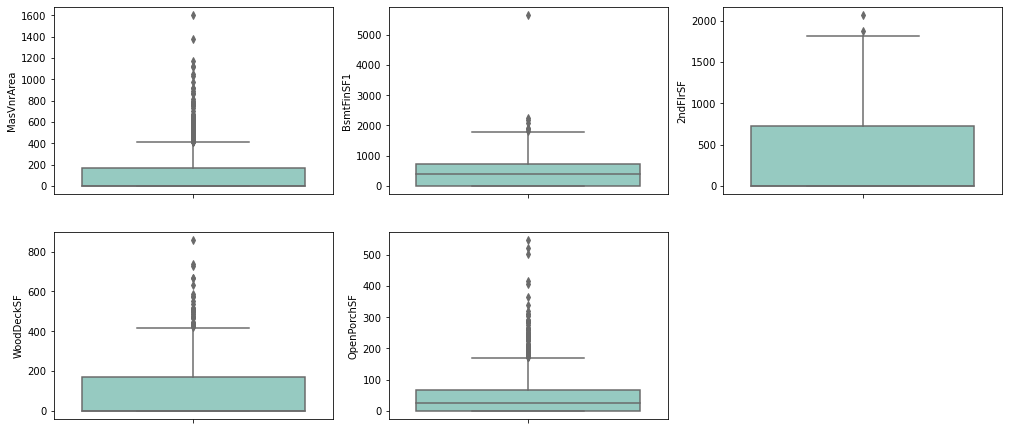

In [21]:
# Lets understand the outliers better through boxplots
# The mean and median for 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF' vary a lot, indicative of outliers
cols_for_outlier_treatment = ['MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize=(17, 20))
i = 1
for col in cols_for_outlier_treatment:
    plt.subplot(5,3,i)
    sns.boxplot(y = col, palette='Set3', data = housing_df)
    i+=1
plt.show()

In [22]:
# Lets remove outliers for columns MasVnrArea, BsmtFinSF1, 2ndFlrSF, WoodDeckSF, OpenPorchSF 
# for which there is huge difference in mean and median value in he above table

housing_df1 = housing_df
# function to remove outliers
def outlier_treatment(df, colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3-q1
    lower_range  = q1-1.5*iqr
    upper_range = q3+1.5*iqr
    df = df[(df[colname]>lower_range) & (df[colname]<upper_range)]
    return df

for col in cols_for_outlier_treatment:
    housing_df1 = outlier_treatment(housing_df1, col)

# checking datashape after outlier treatment
housing_df1.shape

(1246, 59)

In [23]:
# checking percentage of data dropped
(1-len(housing_df1)/len(housing_df))*100

14.657534246575343

In [24]:
# Using standard approach, we are loosing around 15% of the data. 
# So, lets just eliminate the outliers above 98th percentile

# function to remove outliers
def outlier_treatment2(df, colname):
    upper_range = df[colname].quantile(0.98)
    df = df[df[colname]<upper_range]
    return df

for col in cols_for_outlier_treatment:
    housing_df = outlier_treatment2(housing_df, col)

# checking datashape after outlier treatment
housing_df.shape

(1317, 59)

In [25]:
# Mean and median of column BsmtFinSF2 are 46.55 and 0 resp
# It suggests most values are 0 for this column. Lets see the percentage
housing_df['BsmtFinSF2'].value_counts().max()/len(housing_df)*100

88.61047835990888

In [26]:
# Nearly 89% are null, so dropping BsmtFinSF2 and related column 'BsmtFinType2'
housing_df = housing_df.drop(['BsmtFinSF2', 'BsmtFinType2'], axis=1)
housing_df.shape

(1317, 57)

### Derived Variables

In [27]:
# Age of property will be a derived variable. It is calculated since the property is built or remodelled

housing_df['PropAge'] = housing_df.apply(lambda x: x['YrSold'] - x['YearRemodAdd'], axis =1)
housing_df[['YrSold','YearRemodAdd','YearBuilt','PropAge']].head()  

,YrSold,YearRemodAdd,YearBuilt,PropAge
Id,,,,
1,2008,2003,2003,5
2,2007,1976,1976,31
3,2008,2002,2001,6
4,2006,1970,1915,36
5,2008,2000,2000,8


In [28]:
# Create a column to tell whether a property is remodelled

housing_df['isRemodeled'] = housing_df.apply(lambda x: 1 if x['YearBuilt']<x['YearRemodAdd'] else 0, axis =1) 
housing_df[['YearRemodAdd','YearBuilt','isRemodeled']].head() 

,YearRemodAdd,YearBuilt,isRemodeled
Id,,,
1,2003,2003,0
2,1976,1976,0
3,2002,2001,1
4,1970,1915,1
5,2000,2000,0


In [29]:
# creating derived variable to see if Garage is a new construction (post 2000) or old
housing_df['isGarge_newConst'] = housing_df.apply(lambda x: 1 if x['GarageYrBlt'] > 2000 else 0, axis =1) 

In [30]:
# creating derived column for MasVnrType: Masonry veneer type column
housing_df['MasVnrType'] = housing_df['MasVnrType'].apply(lambda x: 0 if x =='None' else 1) 

In [31]:
# Dropping redundant columns
housing_df = housing_df.drop(['YrSold', 'YearRemodAdd', 'MoSold', 'YearBuilt', 'GarageYrBlt'], axis=1)
housing_df.shape

(1317, 55)

## STEP 3 - EDA and Data Visualization

### Univariate Analysis - Quantitative Variable

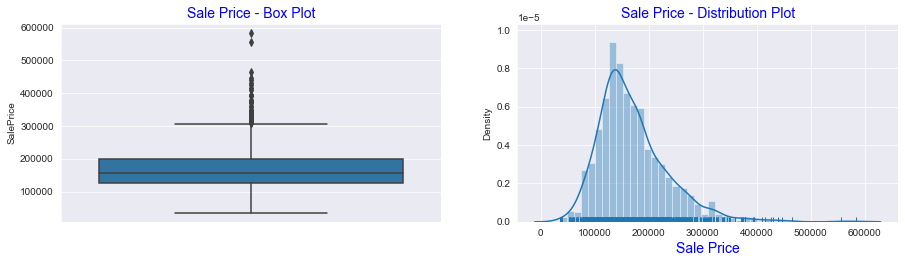

In [32]:
# Sale Price 
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ax = sns.boxplot(y = housing_df.SalePrice)
ax.set_title('Sale Price - Box Plot',fontsize=14,color='b')

plt.subplot(2, 2, 2)
ax = sns.distplot(housing_df.SalePrice, rug = True)
ax.set_title('Sale Price - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Sale Price',fontsize=14,color='b')
plt.show()

**OBSERVATION**
- Sale Price are mostly between 120K to 200K
- Target variable is right skewed. It will need log transformation before model is built
- Median for sale price is around 150K

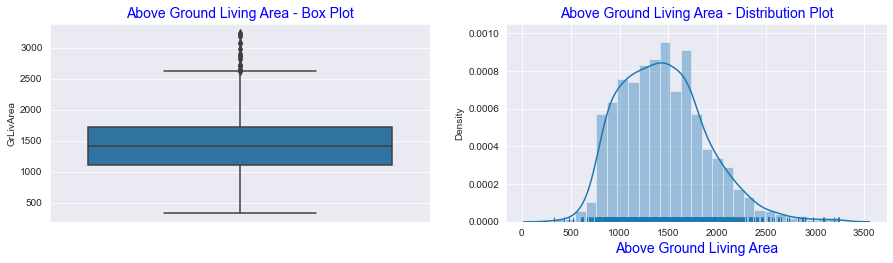

In [33]:
# Above Ground Living Area
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
ax = sns.boxplot(y = housing_df.GrLivArea)
ax.set_title('Above Ground Living Area - Box Plot',fontsize=14,color='b')

plt.subplot(2, 2, 2)
ax = sns.distplot(housing_df.GrLivArea, rug = True)
ax.set_title('Above Ground Living Area - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Above Ground Living Area',fontsize=14,color='b')
plt.show()

**OBSERVATION** - Median for GrLivArea is around 1400 sq feet.

### Univariate Analysis - Categorical

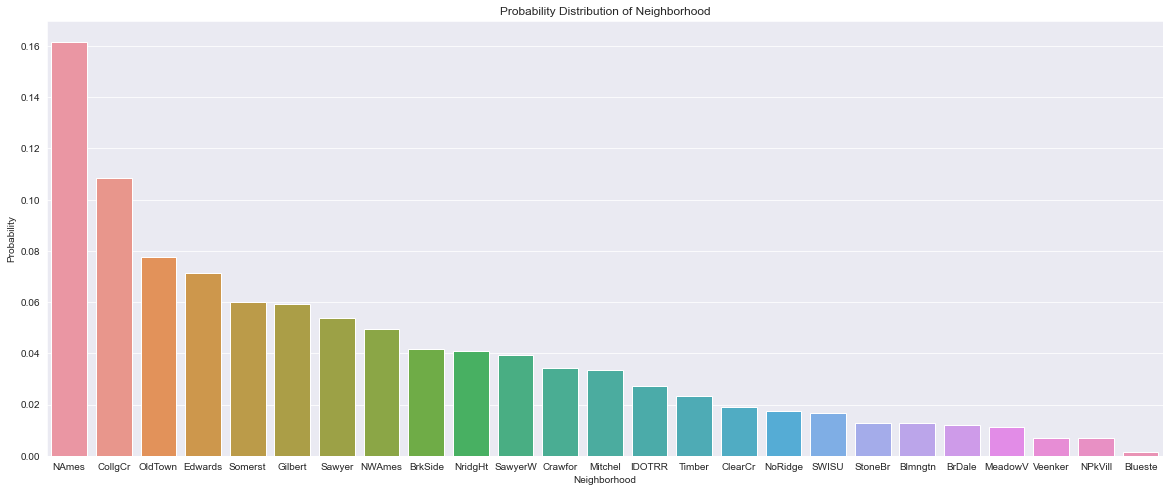

In [34]:
#Bar plot for Neighborhood
plt.figure(figsize=(20, 8))
sns.barplot(x='index', y='Neighborhood', data=housing_df['Neighborhood'].value_counts(normalize=True).reset_index())
plt.xlabel('Neighborhood')
plt.ylabel('Probability')
plt.title('Probability Distribution of Neighborhood')
plt.show()

**OBSERVATION** - Most of the properties are in neighbourhood of North Ames followed by College Creek

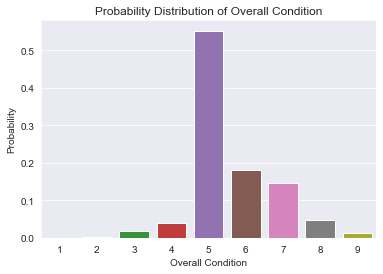

In [35]:
#Bar plot for Overall Condition
plt.figure(figsize=(6,4))
sns.barplot(x='index', y='OverallCond', data=housing_df['OverallCond'].value_counts(normalize=True).reset_index())
plt.xlabel('Overall Condition')
plt.ylabel('Probability')
plt.title('Probability Distribution of Overall Condition')
plt.show()


**OBSERVATION** - Most of the properties sold are with average Overall Condition

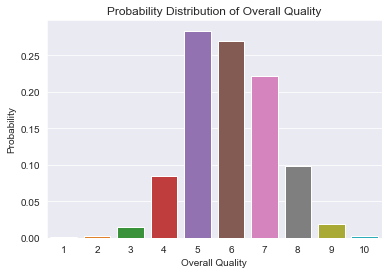

In [36]:
#Bar plot for Overall Quality
plt.figure(figsize=(6,4))
sns.barplot(x='index', y='OverallQual', data=housing_df['OverallQual'].value_counts(normalize=True).reset_index())
plt.xlabel('Overall Quality')
plt.ylabel('Probability')
plt.title('Probability Distribution of Overall Quality')
plt.show()

**OBSERVATION** - Most of the properties sold are in between average and good overall material and finish of the house

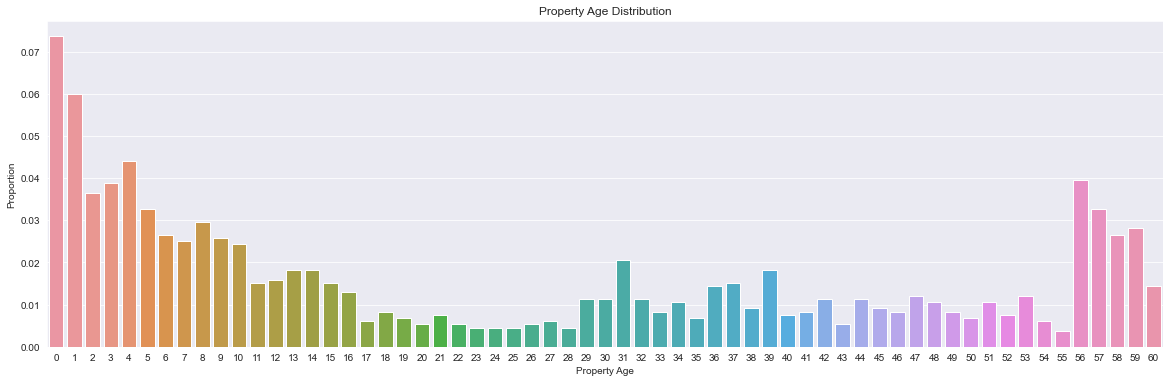

In [37]:
#Bar plot for derived variable PropAge
plt.figure(figsize=(20,6))
sns.barplot(x='index', y='PropAge', data=housing_df['PropAge'].value_counts(normalize=True).reset_index())
plt.xlabel('Property Age')
plt.ylabel('Proportion')
plt.title('Property Age Distribution')
plt.show()

**OBSERVATION** 
- We can see that highest number is for newly constructed or rebuilt model
- Also, there is a sudden spike for 56 year old property selling

### Bivariate Analysis - Continuous vs Categorical

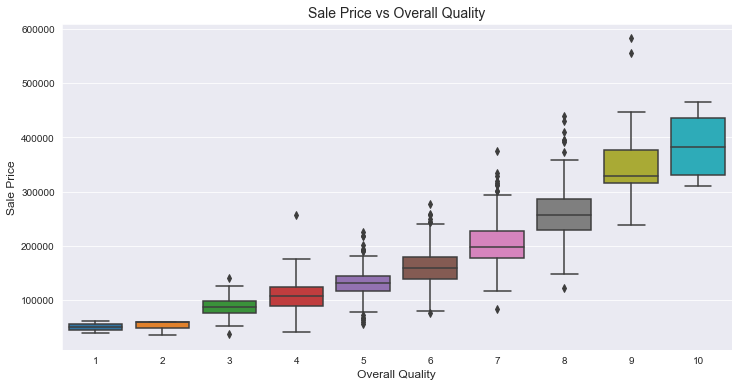

In [38]:
# Box plot for Sale Price vs Overall Quality
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='SalePrice', x='OverallQual', data =housing_df)
ax.set_title('Sale Price vs Overall Quality',fontsize=14)
ax.set_ylabel('Sale Price',fontsize=12)
ax.set_xlabel('Overall Quality',fontsize=12)
plt.show()

**OBSERVATION** 
- As the overall quality increases, the Sale Price is increasing. 
- OverallQual will be a good predictor variable

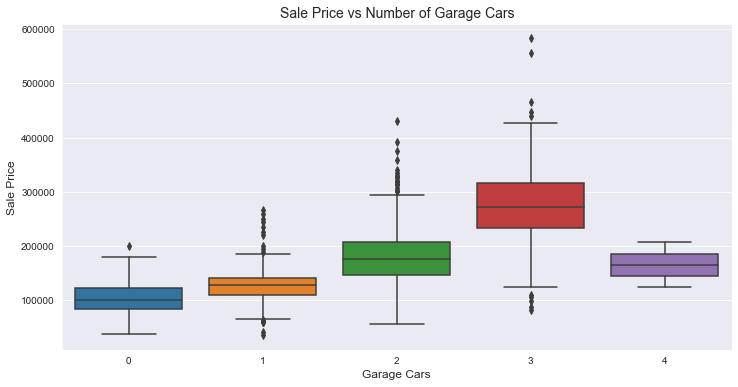

In [39]:
# Box plot for Sale Price vs GarageCars
plt.figure(figsize=(12,6))
ax = sns.boxplot(y='SalePrice', x='GarageCars', data =housing_df)
ax.set_title('Sale Price vs Number of Garage Cars',fontsize=14)
ax.set_ylabel('Sale Price',fontsize=12)
ax.set_xlabel('Garage Cars',fontsize=12)
plt.show()

**OBSERVATION** 
- Sale price for properties accomodating 3 Garage cars is highest  
- A linear increasing trend is seen for Sale Price from 0 to 3 cars
- However, properties accomodating 4 Garage cars are less sought after. So, the decline in price

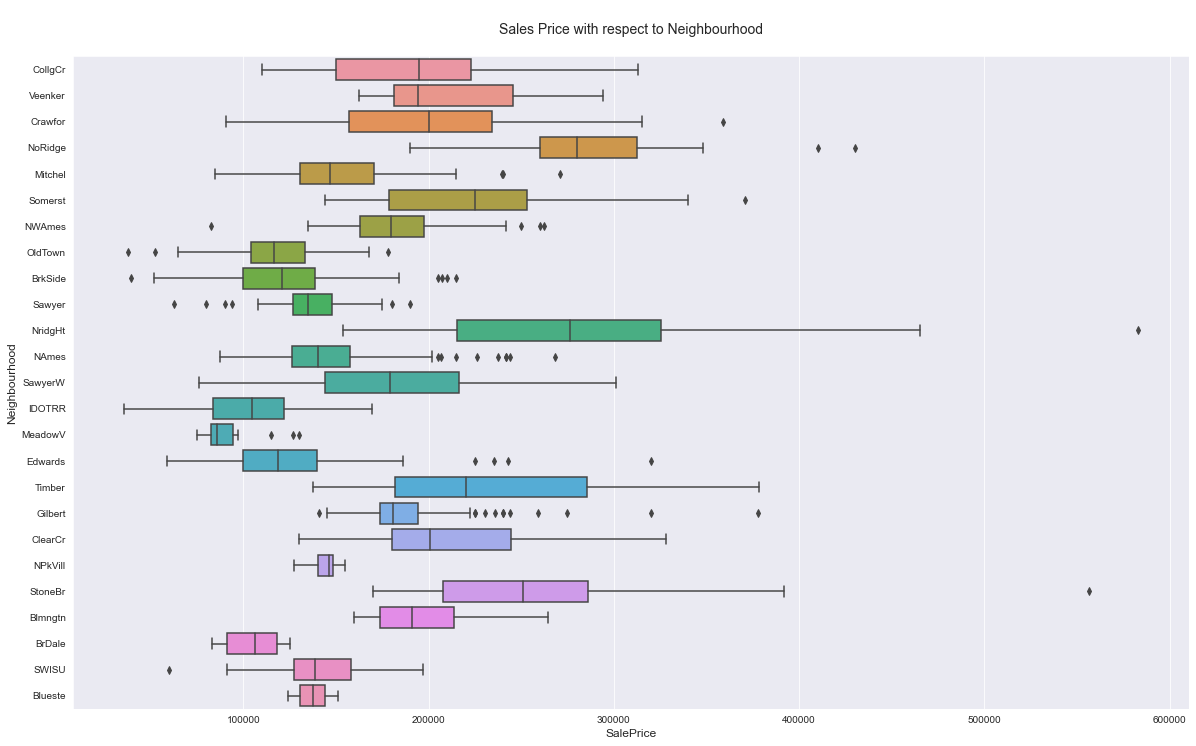

In [40]:
# Box plot for Sales Price with respect to Neighbourhood
plt.figure(figsize=(20,12))
ax = sns.boxplot(x='SalePrice', y='Neighborhood', data =housing_df)
ax.set_title('\nSales Price with respect to Neighbourhood\n',fontsize=14)
ax.set_xlabel('SalePrice',fontsize=12)
ax.set_ylabel('Neighbourhood',fontsize=12)
plt.show()

**OBSERVATION** 
- Properties in the neighbourhood of Northridge are sold at higher rates followed by Northridge Heights
- Worst selling properties are in the neighbourhood of Meadow Village

### Bivariate Analysis - Continuous vs Categorical

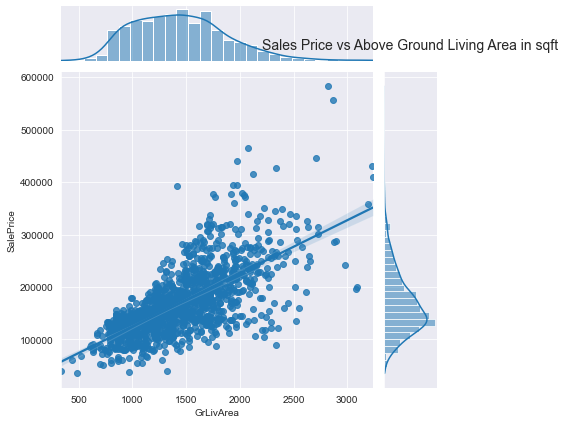

In [41]:
# Joint plot for Sales Price vs Above Ground Living Area
sns.jointplot(x= housing_df['GrLivArea'],y= housing_df['SalePrice'], kind='reg')
plt.title('Sales Price vs Above Ground Living Area in sqft\n',fontsize=14)
plt.show()

**OBSERVATION** 
- A good linear trend is seen between Sales Price And Above Ground Living Area
- There is a positive correlation, so Sales Price will increase with this area

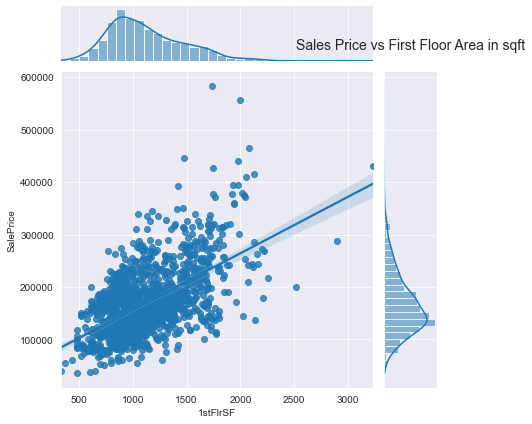

In [42]:
# Joint Plot for Sales Price vs First Floor Area in sqft
sns.set_style('darkgrid')
sns.jointplot(x= housing_df['1stFlrSF'],y= housing_df['SalePrice'], kind= 'reg')
plt.title('Sales Price vs First Floor Area in sqft\n',fontsize=14)
plt.show()

**OBSERVATION** 
- A good linear trend is seen between Sales Price And First floor Area
- There is a positive correlation, so Sales Price will increase with First floor area

**Now lets normalize Target Variable-SalePrice**

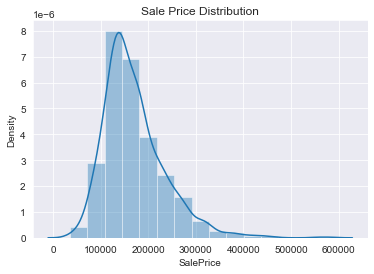

In [43]:
# Lets see how Target variable is distributed
sns.distplot(housing_df['SalePrice'], bins=15)
plt.title('Sale Price Distribution')
plt.show()

**The target variable(Sale Price) distribution is positively skewed. Hence, log transforming it below to achieve Normal Distribution**

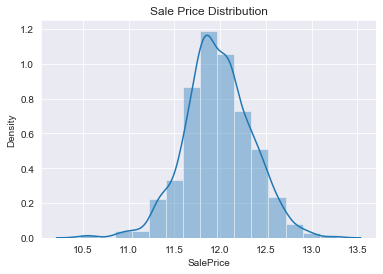

In [44]:
# Log transformation of target variable
housing_df['SalePrice'] = np.log1p(housing_df['SalePrice'])
sns.distplot(housing_df['SalePrice'], bins=15)
plt.title('Sale Price Distribution')
plt.show()

**Achieved normal distribution**

### Multivariate Analysis- Pair Plots

In [45]:
# Separating numerical and categorical columns
cols_numeric = housing_df.select_dtypes(include=['int','float']).columns.to_list()
cols_categorical = housing_df.select_dtypes(include='object').columns.to_list()

In [46]:
print(cols_numeric)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'PropAge', 'isRemodeled', 'isGarge_newConst']


<Figure size 720x360 with 0 Axes>

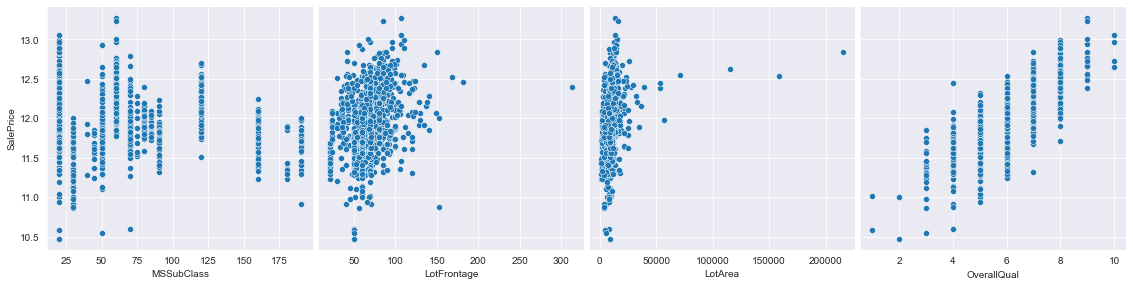

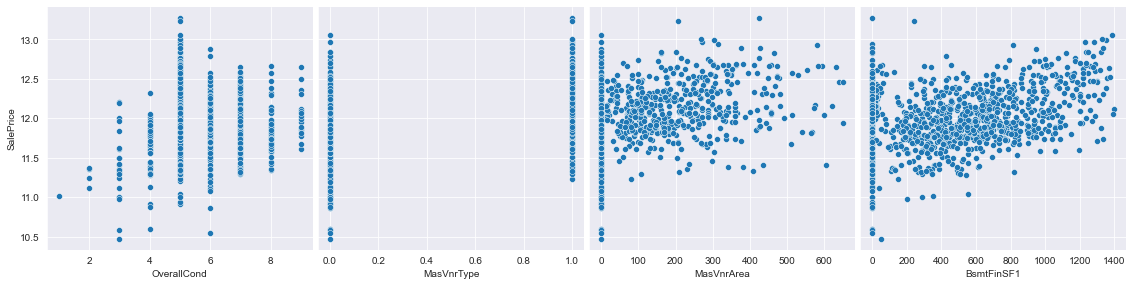

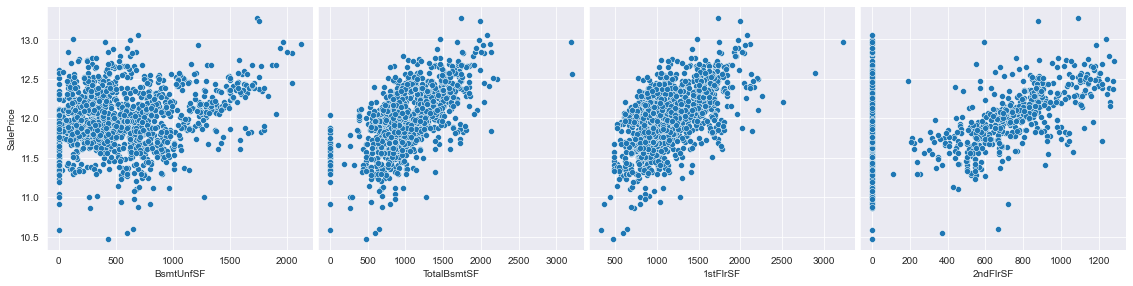

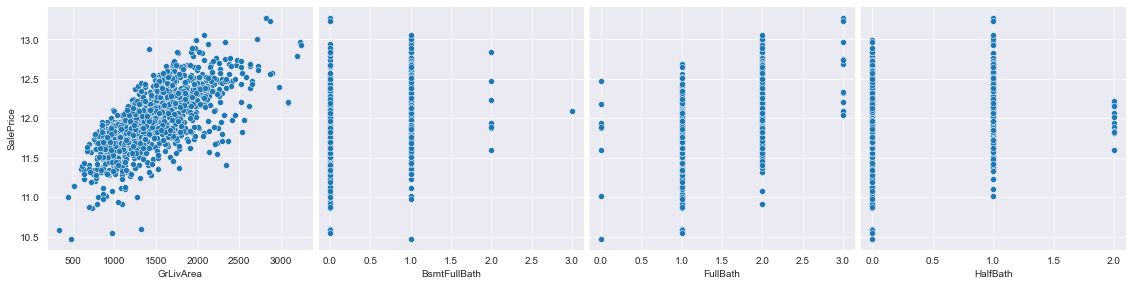

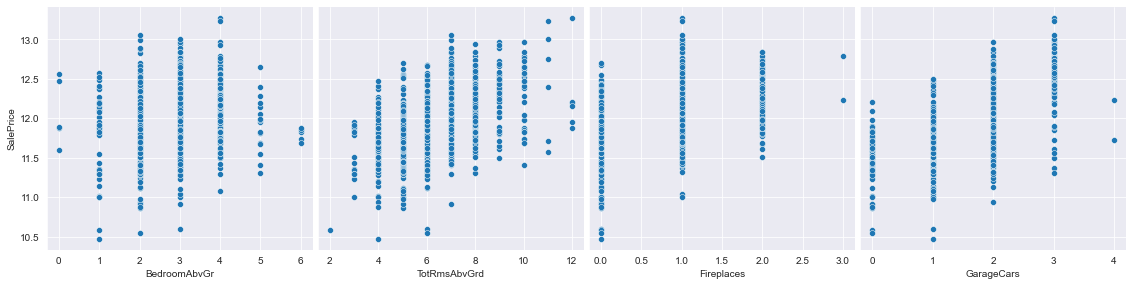

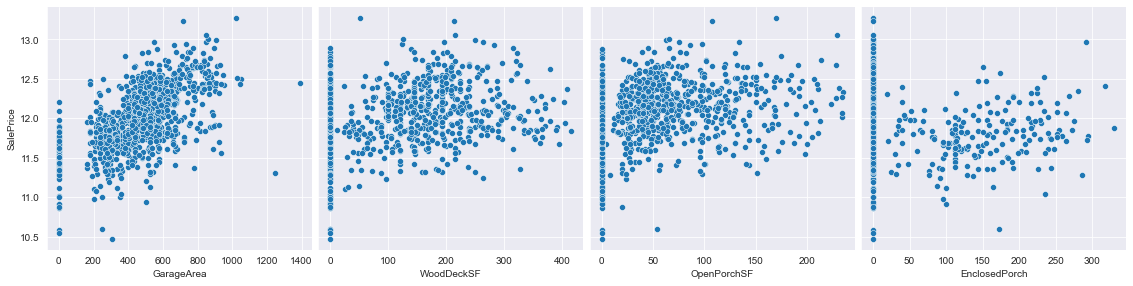

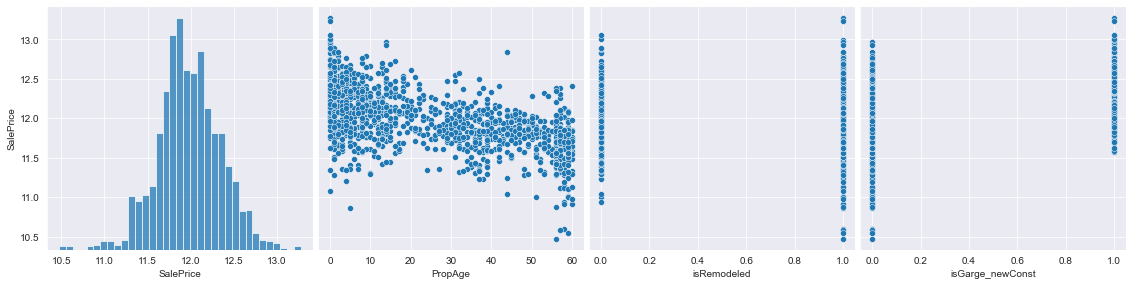

In [47]:
# Check the numerical values using pairplots
plt.figure(figsize=(10,5))
len_cols_numeric =len(cols_numeric)
for i in range(0,len_cols_numeric,4):    
    sns.pairplot(housing_df, x_vars=cols_numeric[i:i+4], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

**OBSERVATION:**
- '1stFlrSF', 'GrLivArea', 'OverallQual' shows a strong linear relation with SalePrice

- 'PropAge' and 'TotalBsmtSF' also show somewhat linear relationaship with SalePrice

### Correlation Matrix

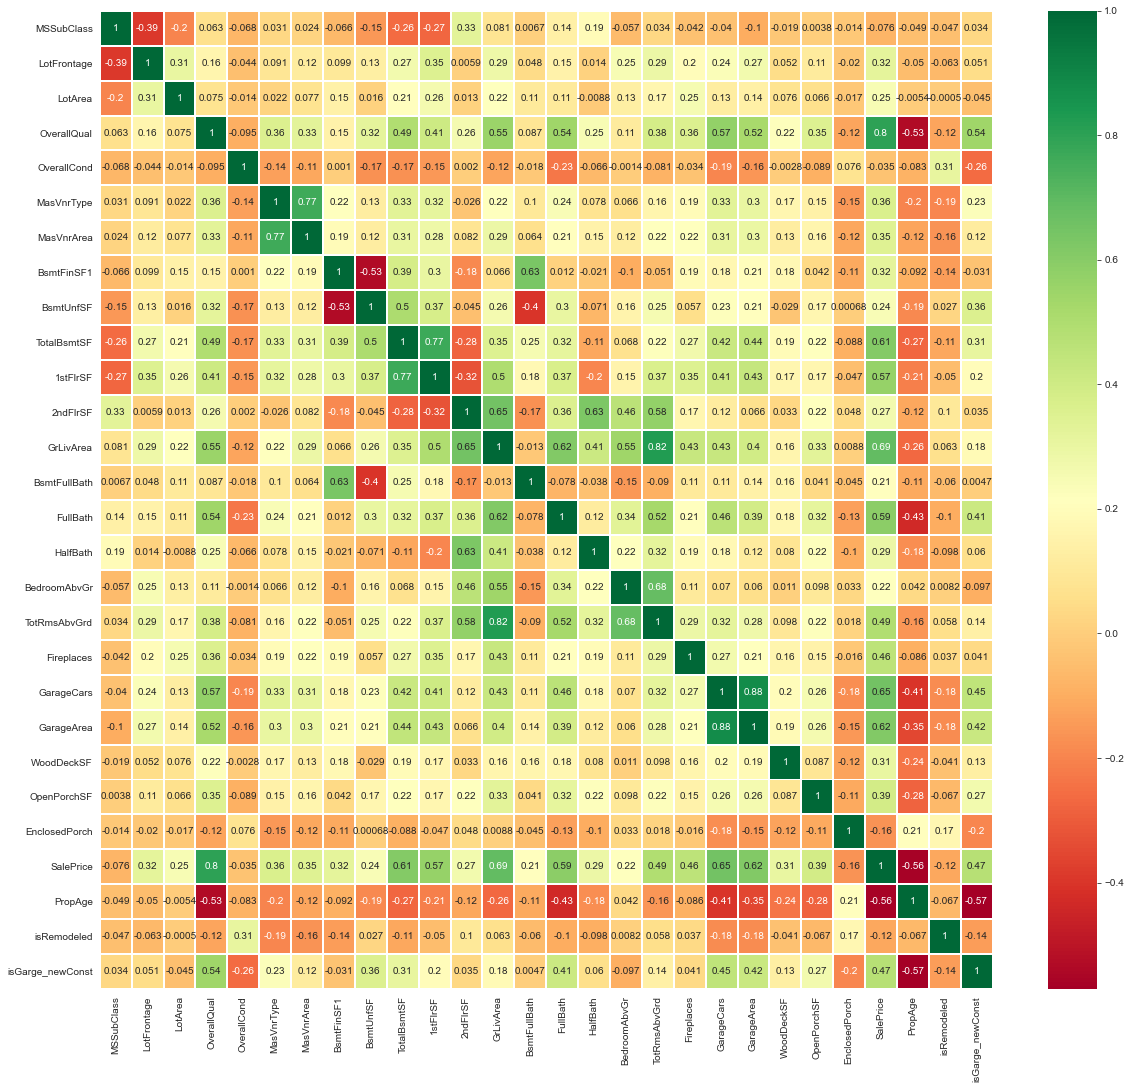

In [48]:
# Lets plot a correlation heat map for the continuous variables
plt.figure(figsize = (20,18))
ax= sns.heatmap(housing_df[cols_numeric].corr(), annot = True, cmap="RdYlGn",linewidth =1)

OBSERVATION:

- 'GarageCars' and 'GarageArea' are 88% collinear. Lets drop 'GarageArea'
- 'TotRmsAbvGrd' and GrLivArea are 82% collinear.  Since 'GrLivArea' looks important as per pair plot. Lets drop 'TotRmsAbvGrd'
- '1stFlrSF' and 'TotalBsmtSF' are 77% collinear. Since '1stFlrSF' looks important as per pair plot. Lets drop 'TotalBsmtSF'
- 'GrLivArea' and '2ndFlrSF' are 65% collinear. Since 'GrLivArea' looks important as per pair plot. Lets drop '2ndFlrSF'
- 'MasVnrType' and 'MasVnrArea' are 77% collinear. Lets drop 'MasVnrType'

In [49]:
# Dropping collinear columns
housing_df = housing_df.drop(['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF', '2ndFlrSF', 'MasVnrType'], axis=1)
housing_df.shape

(1317, 50)

## STEP 4 - Data Preparation

- Using Map function to convert into numerical data
- creating Dummy variables


In [50]:
# categorical columns
housing_df.select_dtypes(include='object').columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
housing_df_dummy = housing_df
housing_df_dummy['LotShape'] = housing_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_df_dummy['LotConfig'] = housing_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0})
housing_df_dummy['BldgType'] = housing_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0})
housing_df_dummy['HouseStyle'] = housing_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0})
housing_df_dummy['ExterQual'] = housing_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['ExterCond'] = housing_df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['BsmtQual'] = housing_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['BsmtCond'] = housing_df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['BsmtExposure'] = housing_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df_dummy['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing_df_dummy['HeatingQC'] = housing_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['KitchenQual'] = housing_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['FireplaceQu'] = housing_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['GarageFinish'] = housing_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0})
housing_df_dummy['GarageQual'] = housing_df['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df_dummy['Fence'] = housing_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0})

housing_df_dummy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,SaleType,SaleCondition,SalePrice,PropAge,isRemodeled,isGarge_newConst
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,3,Lvl,5,CollgCr,Norm,1,4,7,5,Gable,VinylSd,VinylSd,196.0,4,3,PConc,4,3,1,6,706,150,5,856,1710,1,2,1,3,4,0,0,Attchd,2,2,3,0,61,0,0,WD,Normal,12.247699,5,0,1
2,20,RL,80.0,9600,3,Lvl,2,Veenker,Feedr,1,1,6,8,Gable,MetalSd,MetalSd,0.0,3,3,CBlock,4,3,4,5,978,284,5,1262,1262,0,2,0,3,3,1,3,Attchd,2,2,3,298,0,0,0,WD,Normal,12.109016,31,0,0
3,60,RL,68.0,11250,2,Lvl,5,CollgCr,Norm,1,4,7,5,Gable,VinylSd,VinylSd,162.0,4,3,PConc,4,3,2,6,486,434,5,920,1786,1,2,1,3,4,1,3,Attchd,2,2,3,0,42,0,0,WD,Normal,12.317171,6,1,1
4,70,RL,60.0,9550,2,Lvl,4,Crawfor,Norm,1,4,7,5,Gable,Wd Sdng,Wd Shng,0.0,3,3,BrkTil,3,4,1,5,216,540,4,961,1717,1,1,0,3,4,1,4,Detchd,1,3,3,0,35,272,0,WD,Abnorml,11.849405,36,1,0
5,60,RL,84.0,14260,2,Lvl,2,NoRidge,Norm,1,4,8,5,Gable,VinylSd,VinylSd,350.0,4,3,PConc,4,3,3,6,655,490,5,1145,2198,1,2,1,4,4,1,3,Attchd,2,3,3,192,84,0,0,WD,Normal,12.429220,8,0,0


In [52]:
dummy_cols = list(housing_df_dummy.select_dtypes(include='object').columns)

In [53]:
# Creating Dummy variables
housing_df_dummy = pd.get_dummies(data=housing_df,columns = dummy_cols, drop_first=True)
housing_df_dummy.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,SalePrice,PropAge,isRemodeled,isGarge_newConst,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,3,5,1,4,7,5,196.0,4,3,4,3,1,6,706,150,5,856,1710,1,2,1,3,4,0,0,2,2,3,0,61,0,0,12.247699,5,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,3,2,1,1,6,8,0.0,3,3,4,3,4,5,978,284,5,1262,1262,0,2,0,3,3,1,3,2,2,3,298,0,0,0,12.109016,31,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,2,5,1,4,7,5,162.0,4,3,4,3,2,6,486,434,5,920,1786,1,2,1,3,4,1,3,2,2,3,0,42,0,0,12.317171,6,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,2,4,1,4,7,5,0.0,3,3,3,4,1,5,216,540,4,961,1717,1,1,0,3,4,1,4,1,3,3,0,35,272,0,11.849405,36,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,2,2,1,4,8,5,350.0,4,3,4,3,3,6,655,490,5,1145,2198,1,2,1,4,4,1,3,2,3,3,192,84,0,0,12.429220,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
# checking if all the columns are numeric or not
housing_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 1 to 1459
Columns: 134 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(36), uint8(95)
memory usage: 566.0 KB


## STEP 5 - Splitting the Data into Training and Testing Sets

Since, the number of records are less, so lets do a 80:20 split

In [55]:
# X contains dataframe of predictor variables
X = housing_df_dummy.drop(['SalePrice'], axis=1)
X.head()


,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,PropAge,isRemodeled,isGarge_newConst,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,3,5,1,4,7,5,196.0,4,3,4,3,1,6,706,150,5,856,1710,1,2,1,3,4,0,0,2,2,3,0,61,0,0,5,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,3,2,1,1,6,8,0.0,3,3,4,3,4,5,978,284,5,1262,1262,0,2,0,3,3,1,3,2,2,3,298,0,0,0,31,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,2,5,1,4,7,5,162.0,4,3,4,3,2,6,486,434,5,920,1786,1,2,1,3,4,1,3,2,2,3,0,42,0,0,6,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,2,4,1,4,7,5,0.0,3,3,3,4,1,5,216,540,4,961,1717,1,1,0,3,4,1,4,1,3,3,0,35,272,0,36,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,2,2,1,4,8,5,350.0,4,3,4,3,3,6,655,490,5,1145,2198,1,2,1,4,4,1,3,2,3,3,192,84,0,0,8,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [56]:
# y is the target variable
y = housing_df_dummy[['SalePrice']]
y.head()

,SalePrice
Id,
1,12.247699
2,12.109016
3,12.317171
4,11.849405
5,12.429220


In [57]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [58]:
print(X_train.shape)
print(X_test.shape)

(1053, 133)
(264, 133)


#### Rescaling the features using Min-Max scaling

In [59]:
scaler_X = MinMaxScaler()

# Apply scaler() to all nominal variable
list_numeric = X_train.select_dtypes(include=['int','float']).columns.to_list()
X_train[list_numeric] = scaler_X.fit_transform(X_train[list_numeric])
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,PropAge,isRemodeled,isGarge_newConst,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17,0.000000,0.298137,0.046465,0.666667,0.50,0.0,0.000000,0.555556,0.750,0.276923,0.333333,0.5,0.6,0.75,0.25,0.833333,0.413448,0.200849,1.00,0.261310,0.230716,0.333333,0.333333,0.0,0.333333,0.333333,0.333333,0.6,1.000000,0.50,0.6,0.000000,0.000000,0.000000,0.0,0.666667,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
293,0.176471,0.242236,0.047250,1.000000,1.00,0.0,0.285714,0.444444,0.375,0.000000,0.333333,0.5,0.6,0.75,0.25,0.333333,0.208870,0.224422,0.75,0.317473,0.475895,0.000000,0.333333,0.5,0.500000,0.333333,0.333333,0.8,0.333333,0.25,0.6,0.000000,0.000000,0.000000,0.0,0.016667,1.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
405,0.235294,0.298137,0.042366,0.666667,1.00,0.0,0.428571,0.555556,0.500,0.000000,0.333333,0.5,0.8,0.75,0.25,0.166667,0.000000,0.380009,0.75,0.184087,0.426309,0.000000,0.666667,0.5,0.500000,0.333333,0.333333,0.6,1.000000,0.50,0.6,0.000000,0.170213,0.000000,0.0,0.183333,1.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
430,0.000000,0.677019,0.047475,0.666667,0.75,0.0,0.000000,0.555556,0.500,0.000000,0.333333,0.5,0.8,0.75,0.50,1.000000,0.718884,0.182461,0.50,0.420437,0.371212,0.333333,0.666667,0.0,0.500000,0.666667,0.333333,0.6,0.333333,0.50,0.6,0.000000,0.000000,0.512121,0.0,0.350000,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1284,0.411765,0.453416,0.037860,1.000000,0.75,0.5,0.428571,0.555556,0.500,0.000000,0.333333,0.5,0.6,0.75,0.75,0.166667,0.000000,0.429986,0.50,0.225429,0.513085,0.000000,0.666667,1.0,0

In [60]:
# checking after scaling is applied
X_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,PropAge,isRemodeled,isGarge_newConst,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,...,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.0,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,0.213815,0.298261,0.041167,0.872428,0.899335,0.110874,0.237960,0.553551,0.574193,0.127818,0.451092,0.521368,0.686800,0.731244,0.394824,0.578664,0.288533,0.265755,0.784425,0.308694,0.383643,0.135169,0.510605,0.181861,0.471035,0.486546,0.189934,0.342260,0.555872,0.428538,0.557645,0.198111,0.171817,0.065104,0.126306,0.393637,0.462488,0.248813,0.049383,0.009497,0.776828,0.157645,0.036087,0.023742,0.898386,0.001899,0.013295,0.043685,0.018993,0.114910,0.033238,0.066477,0.059829,0.029440,0.011396,0.036087,0.157645,0.005698,0.048433,0.015195,...,0.007597,0.015195,0.001899,0.004748,0.809117,0.006648,0.169041,0.005698,0.001899,0.000950,0.0009

In [61]:
# Applying scaling to test dataset
X_test[list_numeric] = scaler_X.transform(X_test[list_numeric])
X_test.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,PropAge,isRemodeled,isGarge_newConst,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.00000,264.000000,...,264.000000,264.000000,264.0,264.0,264.000000,264.000000,264.000000,264.0,264.0,264.0,264.000000,264.000000,264.0,264.000000,264.000000,264.000000,264.000000,264.0,264.000000,264.000000,264.000000,264.000000,264.0,264.000000,264.000000,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0,264.000000,264.0,264.00000,264.0,264.000000,264.000000,264.000000,264.000000,264.000000,264.00000
mean,0.223485,0.291526,0.039285,0.863636,0.892992,0.125947,0.213745,0.548822,0.567708,0.111789,0.452020,0.513258,0.689394,0.731061,0.388258,0.578914,0.282752,0.274152,0.762311,0.306898,0.379602,0.126263,0.502525,0.176136,0.479798,0.496212,0.183081,0.327273,0.546717,0.416667,0.564394,0.173077,0.145487,0.077158,0.115530,0.414205,0.503788,0.234848,0.026515,0.015152,0.814394,0.136364,0.018939,0.018939,0.909091,0.0,0.007576,0.034091,0.018939,0.083333,0.037879,0.090909,0.056818,0.018939,0.011364,0.022727,0.178030,0.011364,0.05303,0.026515,...,0.011364,0.022727,0.0,0.0,0.780303,0.015152,0.196970,0.0,0.0,0.0,0.003788,0.041667,0.0,0.037879,0.151515,0.102273,0.064394,0.0,0.030303,0.337121,0.170455,0.034091,0.0,0.015152,0.026515,0.0,0.034091,0.128788,0.011364,0.102273,0.083333,0.003788,0.034091,0.333333,0.166667,0.037879,0.420455,0.

## STEP 6 - RFE (Recursive Feature Elimination)

In [62]:
# Lets first use RFE to bring down the predictor variables to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [63]:
# Lets see the ranking of predictor vaiables after running RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 80),
 ('LotConfig', False, 49),
 ('BldgType', False, 14),
 ('HouseStyle', False, 54),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 35),
 ('ExterQual', False, 33),
 ('ExterCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 26),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 5),
 ('HeatingQC', True, 1),
 ('1stFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 15),
 ('BedroomAbvGr', False, 24),
 ('KitchenQual', True, 1),
 ('Fireplaces', False, 46),
 ('FireplaceQu', True, 1),
 ('GarageFinish', False, 50),
 ('GarageCars', True, 1),
 ('GarageQual', True, 1),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 65),
 ('Fence', False, 58),
 ('PropAge', True, 1),
 ('isRemodeled', False, 47),
 ('isGarge_newConst

In [64]:
# list of top 50 predictor variables after running RFE
predictors =  X_train.columns[rfe.support_]
predictors

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenQual', 'FireplaceQu', 'GarageCars', 'GarageQual', 'OpenPorchSF',
       'PropAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng',
       'Foundation_PConc', 'Foundation_Stone', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_New', 'SaleCondition_AdjLand',
       'SaleCondition_Norma

In [65]:
# Lets also see the non-selected columns incase we may miss out any important for business
X_train.columns[~rfe.support_]

Index(['LotShape', 'LotConfig', 'BldgType', 'HouseStyle', 'MasVnrArea',
       'ExterQual', 'BsmtFinType1', 'BsmtUnfSF', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageFinish', 'WoodDeckSF', 'EnclosedPorch', 'Fence',
       'isRemodeled', 'isGarge_newConst', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Ext

**OBSERVATION:**
- All looks good based on our previous conclusions during EDA

In [66]:
# Creating X_train dataframe with RFE selected predictors
X_train_rfe = X_train[predictors]

In [67]:
# Lets subset X_train and X_test for the RFE supported columns
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train_rfe.columns]

## STEP 7 - Model Building and Evaluation using Linear regression

In [68]:
# We will use statsmodel for detailed  statistical inferences

# Adding constant
X_train_lm1 = sm.add_constant(X_train)

# building first fitted model
lr_1 = sm.OLS(y_train, X_train_lm1).fit()

# summary statistics of model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:43:25   Log-Likelihood:                 885.85
No. Observations:                1053   AIC:                            -1672.
Df Residuals:                    1003   BIC:                            -1424.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.40

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def VIF_Calculator(X_train_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF_Calculator(X_train_rfe)

,Features,VIF
40,Exterior2nd_CBlock,inf
37,Exterior1st_CBlock,inf
23,MSZoning_RL,70.84
6,BsmtQual,68.24
7,BsmtCond,64.73
3,OverallQual,54.11
5,ExterCond,43.81
38,Exterior1st_CemntBd,41.60
41,Exterior2nd_CmentBd,41.26
4,OverallCond,31.41


**The above model doesn't seem to be a good fit as the p-value of many variables is above 0.05
Also, VIF of many are above 2.5 and some even reaching infinity indicating very high multicollinearity.
Lets try with 20 variables**

In [71]:
# Using RFE to bring down the predictor variables to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [72]:
predictors =  X_train.columns[rfe.support_]
# Creating X_train dataframe with RFE selected predictors
X_train_rfe1 = X_train[predictors]

In [73]:
# Lets subset X_train and X_test for the RFE supported columns
X_train1 = X_train_rfe[X_train_rfe1.columns]
X_test1 =  X_test[X_train_rfe1.columns]

In [74]:
# We will use statsmodel for detailed  statistical inferences

# Adding constant
X_train_lm1 = sm.add_constant(X_train1)

# building first fitted model
lr_1 = sm.OLS(y_train, X_train_lm1).fit()

# summary statistics of model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     412.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:43:25   Log-Likelihood:                 720.08
No. Observations:                1053   AIC:                            -1398.
Df Residuals:                    1032   BIC:                            -1294.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.3887    

**OBSERVATION:**
- Some predictors still have higher p-values like Exterior1st_CemntBd, Exterior2nd_CemntBd and Foundation_Stone
- R-square and adjusted R-square both look fine around 89%

Lets fine tune the model using ridge and lasso regression techniques

## STEP 8 - Model Building and Evaluation using Ridge regression

In [75]:
# Performing Ridge regression with GridSearch Cross Validation
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_obj = Ridge()
no_of_folds = 5
ridge_lm_cv = GridSearchCV(estimator = ridge_obj, 
                        param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = no_of_folds, 
                        return_train_score=True,
                        verbose = 1)         
ridge_lm_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# printing ridge optimised parameters and best mean test score
print(ridge_lm_cv.best_params_)
print(ridge_lm_cv.best_score_)

{'alpha': 0.5}
-0.0819483162109418


In [77]:
# printing mean train and test scores along with rank
ridge_results = pd.DataFrame(ridge_lm_cv.cv_results_)
ridge_results[['param_alpha', 'rank_test_score', 'mean_train_score', 'mean_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,rank_test_score,mean_train_score,mean_test_score
7,0.5,1,-0.076678,-0.081948
8,0.6,2,-0.076820,-0.081958
6,0.4,3,-0.076542,-0.081985
9,0.7,4,-0.076960,-0.082000
10,0.8,5,-0.077105,-0.082040
5,0.3,6,-0.076417,-0.082068
11,0.9,7,-0.077244,-0.082087
12,1.0,8,-0.077381,-0.082160
4,0.2,9,-0.076288,-0.082226
3,0.1,10,-0.076155,-0.082459


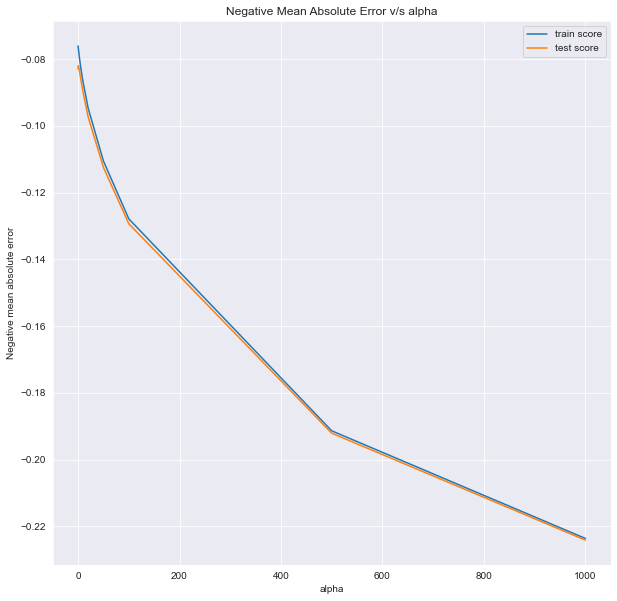

In [78]:
# Plotting test and train mean scores for different values of lambda/alpha
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('float64')
# plotting
plt.figure(figsize=(10,10))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative Mean Absolute Error v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [79]:
# fitting ridge for best alpha/lambda value
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge.coef_

array([[-0.08832911,  0.08289731,  0.33498895,  0.50194301,  0.22825302,
        -0.04152075,  0.14154932,  0.07168854,  0.07242555,  0.10751218,
         0.07203842,  0.15429437,  0.69198917,  0.09262687,  0.07134359,
         0.08235831,  0.05702952,  0.16163623,  0.15105083,  0.05825955,
        -0.06672549,  0.23501648,  0.13686123,  0.20116059,  0.12220064,
         0.0718292 ,  0.08271711, -0.05079342, -0.10099197,  0.05520794,
         0.07155549, -0.06038362, -0.08918955,  0.113279  ,  0.05785113,
        -0.33554741,  0.06817203, -0.05567791, -0.07328206, -0.10601584,
        -0.05567791,  0.11257644,  0.05653125,  0.04686461,  0.06079178,
         0.0848217 , -0.03645775,  0.13697695,  0.14677206,  0.08317096]])

In [80]:
# predicting target variable
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Checking metrics mean squared error
print('Mean Squared Error = ',mean_squared_error(y_test, y_test_pred))

#lets predict the R-squared value of test and train data
print('R-squared for train data = ',r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared for test data = ',r2_score(y_true=y_test, y_pred=y_test_pred))

Mean Squared Error =  0.018757237042269496
R-squared for train data =  0.918089972983892
R-squared for test data =  0.8573246351254193


In [81]:
# Checking coefficient for each predictor varaible
ridge_housing_df = pd.DataFrame({'Predictors':X_train.columns, 'Beta-Coefficients':np.array(ridge.coef_.round(3)).flatten()})
ridge_housing_df = ridge_housing_df.sort_values(by=['Beta-Coefficients'], ascending=False)
ridge_housing_df.reset_index(drop=True, inplace=True)
ridge_housing_df.head(10)

,Predictors,Beta-Coefficients
0,GrLivArea,0.692
1,OverallQual,0.502
2,LotArea,0.335
3,MSZoning_FV,0.235
4,OverallCond,0.228
5,MSZoning_RL,0.201
6,GarageCars,0.162
7,1stFlrSF,0.154
8,GarageQual,0.151
9,SaleCondition_AdjLand,0.147


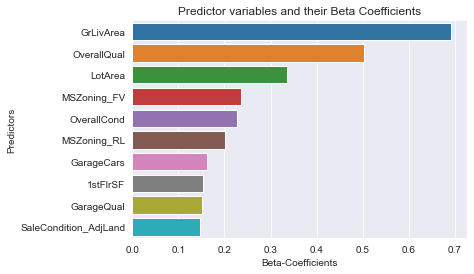

In [82]:
# plotting Predictor variables and their Beta Coefficients
sns.barplot(y = 'Predictors', x='Beta-Coefficients', data = ridge_housing_df.head(10))
plt.title('Predictor variables and their Beta Coefficients')
plt.show()

## STEP 8 - Model Building and Evaluation using Lasso regression

In [83]:
# Performing Lasso regression with GridSearch Cross Validation
lambdas = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
lasso_obj = Lasso()
no_of_folds = 5
lasso_lm_cv = GridSearchCV(estimator = lasso_obj, 
                        param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = no_of_folds, 
                        return_train_score=True,
                        verbose = 1)         
lasso_lm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# printing lasso optimised parameters and best mean test score
print(lasso_lm_cv.best_params_)
print(lasso_lm_cv.best_score_)

{'alpha': 0.0002}
-0.08216933546237634


In [85]:
# printing mean train and test scores along with rank
lasso_results = pd.DataFrame(lasso_lm_cv.cv_results_)
lasso_results[['param_alpha', 'rank_test_score', 'mean_train_score', 'mean_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,rank_test_score,mean_train_score,mean_test_score
1,0.0002,1,-0.077299,-0.082169
2,0.0003,2,-0.078071,-0.082275
0,0.0001,3,-0.076667,-0.082394
3,0.0004,4,-0.078809,-0.082807
4,0.0005,5,-0.079496,-0.083278
5,0.001,6,-0.082109,-0.085311
6,0.002,7,-0.086595,-0.089336
7,0.003,8,-0.091846,-0.093915
8,0.004,9,-0.096470,-0.098392
9,0.005,10,-0.100352,-0.102076


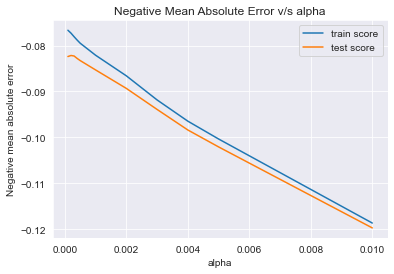

In [86]:
# Plotting test and train mean scores for different values of lambda/alpha
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative Mean Absolute Error v/s alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [87]:
# fitting lasso for best lambda/alpha value
lasso = Lasso(alpha=0.0002)        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.09007613,  0.06395951,  0.31967607,  0.54475796,  0.22038098,
       -0.0032841 ,  0.14245182,  0.05487307,  0.07552972,  0.10999239,
        0.06626155,  0.14843389,  0.71390325,  0.0873455 ,  0.05700307,
        0.07884012,  0.05580475,  0.15808076,  0.1427384 ,  0.05483094,
       -0.06881831,  0.1512317 ,  0.03707103,  0.11991708,  0.0345367 ,
        0.06048393,  0.07625681, -0.04506795, -0.07618546,  0.03607202,
        0.06271395, -0.05795671, -0.07958071,  0.0923989 ,  0.02923696,
       -0.29776968,  0.06774007, -0.        ,  0.        , -0.09524508,
       -0.        ,  0.03207245,  0.04481366,  0.04595923,  0.        ,
        0.        , -0.        ,  0.13414312,  0.08756178,  0.08075454])

In [88]:
# predicting target variable
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Checking metrics mean squared error
print('Mean Squared Error = ',mean_squared_error(y_test, y_test_pred))

#lets predict the R-squared value of test and train data
print('R-squared for train data = ',r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared for test data = ',r2_score(y_true=y_test, y_pred=y_test_pred))

Mean Squared Error =  0.019211778928539935
R-squared for train data =  0.9162909798115781
R-squared for test data =  0.85386720003899


In [89]:
# Checking coefficient for each predictor varaible
lasso_housing_df = pd.DataFrame({'Predictors':X_train.columns, 'Beta-Coefficients':np.array(lasso.coef_.round(3)).flatten()})
lasso_housing_df = lasso_housing_df.sort_values(by=['Beta-Coefficients'], ascending=False)
lasso_housing_df.reset_index(drop=True, inplace=True)
lasso_housing_df.head(10)

,Predictors,Beta-Coefficients
0,GrLivArea,0.714
1,OverallQual,0.545
2,LotArea,0.320
3,OverallCond,0.220
4,GarageCars,0.158
5,MSZoning_FV,0.151
6,1stFlrSF,0.148
7,GarageQual,0.143
8,BsmtQual,0.142
9,SaleType_New,0.134


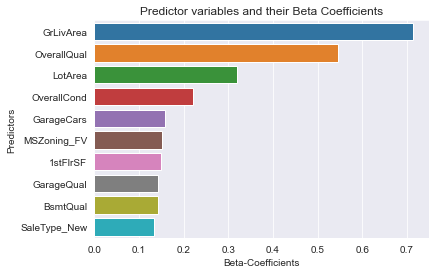

In [90]:
# plotting Predictor variables and their Beta Coefficients
sns.barplot(y = 'Predictors', x='Beta-Coefficients', data = lasso_housing_df.head(10))
plt.title('Predictor variables and their Beta Coefficients')
plt.show()

## Conclusion:

- Optimum parameters through Ridge Regression
    - lambda : 0.5
    - Mean Squared Error : 0.0187
    - R-squared on train data : 0.9180
    - R-squared on test data : 0.8573
    
- Top 10 best predictor for Ridge are -
    - 'GrLivArea'
    - 'OverallQual'
    - 'LotArea'
    - 'MSZoning_FV'
    - 'OverallCond'
    - 'MSZoning_RL'
    - 'GarageCars'
    - '1stFlrSF'
    - 'GarageQual'
    - 'SaleCondition_AdjLand'

- Optimum parameters through Lasso Regression
    - lambda : 0.0002
    - Mean Squared Error : 0.0192
    - R-squared on train data : 0.9163
    - R-squared on test data : 0.8539
    
- Top 10 best predictor for Lasso are -
    - 'GrLivArea'
    - 'OverallQual'
    - 'LotArea'
    - 'OverallCond'
    - 'GarageCars'
    - 'MSZoning_FV'
    - '1stFlrSF'
    - 'GarageQual'
    - 'BsmtQual'
    - 'SaleType_New'    

- Performance wise, both Ridge and Lasso models are at par with each other. However, I will prefer Lasso as it tends to push beta coefficients to absolute zero and helps in feature reduction. However, Ridge can only shrink the beta coefficients towards zero and so we end up having lot many predictor variables even if they are not relevant 

## SUBJECTIVE Questions

***Question 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?***

***Ridge( alpha=1.0 )***

In [91]:
# Best value of alpha is 0.5
# lets do it for 1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.coef_

array([[-0.08465898,  0.08808989,  0.27588433,  0.48606022,  0.22237529,
        -0.03372559,  0.13997402,  0.07392846,  0.07369454,  0.10768825,
         0.0713033 ,  0.16094362,  0.66602608,  0.09187767,  0.08261203,
         0.0876489 ,  0.06180536,  0.16383825,  0.14857617,  0.06098776,
        -0.06850387,  0.19991945,  0.0991783 ,  0.16870891,  0.08776894,
         0.07679695,  0.08413609, -0.0516779 , -0.10132601,  0.05847675,
         0.06971625, -0.05857726, -0.08480378,  0.10821786,  0.05241933,
        -0.24917325,  0.07068361, -0.046463  , -0.04184719, -0.1012252 ,
        -0.046463  ,  0.0819064 ,  0.05309203,  0.04718133,  0.04131878,
         0.07048526, -0.03143879,  0.13587159,  0.1278664 ,  0.08332519]])

In [92]:
# predicting target variable
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Checking metrics mean squared error
print('Mean Squared Error = ',mean_squared_error(y_test, y_test_pred))

#lets predict the R-squared value of test and train data
print('R-squared for train data = ',r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared for test data = ',r2_score(y_true=y_test, y_pred=y_test_pred))

Mean Squared Error =  0.01890849187461637
R-squared for train data =  0.9170514108588816
R-squared for test data =  0.8561741278121353


In [93]:
# Checking coefficient for each predictor varaible
ridge_housing_df = pd.DataFrame({'Predictors':X_train.columns, 'Beta-Coefficients':np.array(ridge.coef_.round(3)).flatten()})
ridge_housing_df = ridge_housing_df.sort_values(by=['Beta-Coefficients'], ascending=False)
ridge_housing_df.reset_index(drop=True, inplace=True)
print(list(ridge_housing_df.Predictors.head(10)))

['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'MSZoning_FV', 'MSZoning_RL', 'GarageCars', '1stFlrSF', 'GarageQual', 'BsmtQual']


***Lasso( alpha=0.0004 )***

In [94]:
# Best value of apha is 0.0002
# lets do it for 0.0004
lasso = Lasso(alpha=0.0004)        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.08999588,  0.05912279,  0.21190692,  0.55646792,  0.21295478,
       -0.        ,  0.13797515,  0.04772052,  0.07873544,  0.11661853,
        0.06096128,  0.14531501,  0.71231456,  0.07951457,  0.05521069,
        0.0793144 ,  0.05965556,  0.16284694,  0.13101877,  0.05550297,
       -0.07213476,  0.11465072,  0.        ,  0.08999594,  0.        ,
        0.05804782,  0.06929208, -0.04128508, -0.04568821,  0.02028091,
        0.05288575, -0.05360687, -0.06774462,  0.06983512,  0.        ,
       -0.09348079,  0.07030282, -0.        ,  0.        , -0.07912665,
       -0.        ,  0.01828358,  0.02866053,  0.04656709,  0.        ,
        0.        , -0.        ,  0.1310359 ,  0.00462486,  0.07790509])

In [95]:
# predicting target variable
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Checking metrics mean squared error
print('Mean Squared Error = ',mean_squared_error(y_test, y_test_pred))

#lets predict the R-squared value of test and train data
print('R-squared for train data = ',r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared for test data = ',r2_score(y_true=y_test, y_pred=y_test_pred))

Mean Squared Error =  0.019096608118862102
R-squared for train data =  0.9131270414882784
R-squared for test data =  0.8547432372323494


In [96]:
# Checking coefficient for each predictor varaible
lasso_housing_df = pd.DataFrame({'Predictors':X_train.columns, 'Beta-Coefficients':np.array(lasso.coef_.round(3)).flatten()})
lasso_housing_df = lasso_housing_df.sort_values(by=['Beta-Coefficients'], ascending=False)
lasso_housing_df.reset_index(drop=True, inplace=True)
print(list(lasso_housing_df.Predictors.head(10)),'\n\n')

['GrLivArea', 'OverallQual', 'OverallCond', 'LotArea', 'GarageCars', '1stFlrSF', 'BsmtQual', 'SaleType_New', 'GarageQual', 'BsmtFinSF1'] 




***Question 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?***

In [97]:
drop_col_top5predictor_lasso_drop = ['GrLivArea', 'OverallQual', 'LotArea', 'OverallCond', 'GarageCars']
X_train2 = X_train.drop(drop_col_top5predictor_lasso_drop,axis=1)
X_test2 = X_test.drop(drop_col_top5predictor_lasso_drop,axis=1)

In [98]:
# Fitting Lasso model
lasso = Lasso(alpha=0.0002)        
lasso.fit(X_train2, y_train) 
lasso.coef_

array([ 0.01056268,  0.25008624,  0.00100622,  0.2469535 ,  0.09773351,
        0.06383116,  0.08089437,  0.08329722,  0.44041495,  0.07813461,
        0.34862851,  0.22612142,  0.14836285,  0.31963337,  0.11323158,
       -0.10324722,  0.17001733,  0.02624218,  0.14073234,  0.05435937,
        0.1487071 ,  0.15371991, -0.07115597, -0.22267332,  0.19736015,
        0.07455053, -0.00730751, -0.02063571,  0.11822366,  0.02770961,
       -0.31633688,  0.09137225, -0.        ,  0.        , -0.07343604,
       -0.        ,  0.06630452,  0.04399408,  0.04418691,  0.        ,
        0.        , -0.        ,  0.11719099,  0.12043246,  0.08447887])

In [99]:
# predicting target variable
y_train_pred = lasso.predict(X_train2)
y_test_pred = lasso.predict(X_test2)

# Checking metrics mean squared error
print('Mean Squared Error = ',mean_squared_error(y_test, y_test_pred))

#lets predict the R-squared value of test and train data
print('R-squared for train data = ',r2_score(y_true=y_train, y_pred=y_train_pred))
print('R-squared for test data = ',r2_score(y_true=y_test, y_pred=y_test_pred))

Mean Squared Error =  0.0322281867361311
R-squared for train data =  0.8481880420937657
R-squared for test data =  0.7548589756870034


In [100]:
# Checking coefficient for each predictor varaible
lasso_housing_df1 = pd.DataFrame({'Predictors':X_train2.columns, 'Beta-Coefficients':np.array(lasso.coef_.round(3)).flatten()})
lasso_housing_df1 = lasso_housing_df1.sort_values(by=['Beta-Coefficients'], ascending=False)
lasso_housing_df1.reset_index(drop=True, inplace=True)
print(list(lasso_housing_df1.Predictors.head(5)),'\n\n')

['1stFlrSF', 'FullBath', 'GarageQual', 'LotFrontage', 'BsmtQual'] 


